# heart failure classification task

# Feature information
creatinine_phosphokinase - Creatine kinase, also known as creatine phosphokinase or phosphocreatine kinase, is an enzyme expressed by various tissues and cell types. CK catalyses the conversion of creatine and uses adenosine triphosphate to create phosphocreatine and adenosine diphosphate 

anaemia - A condition in which the blood doesn't have enough healthy red blood cells.

 

platelets - Platelets, or thrombocytes, are small, colorless cell fragments in our blood that form clots and stop or prevent bleeding. Platelets are made in our bone marrow, the sponge-like tissue inside our bones


serum_creatinine - Creatinine is a breakdown product of creatine phosphate from muscle and protein metabolism. It is released at a constant rate by the body.

 

# imported necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA(Exploratory data analysis)

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

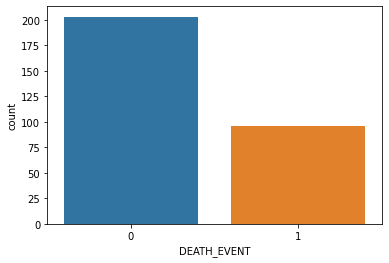

In [6]:
sns.countplot(data=df,x='DEATH_EVENT')

there are imbalance class 0 means no death_event has more records then less death(1)

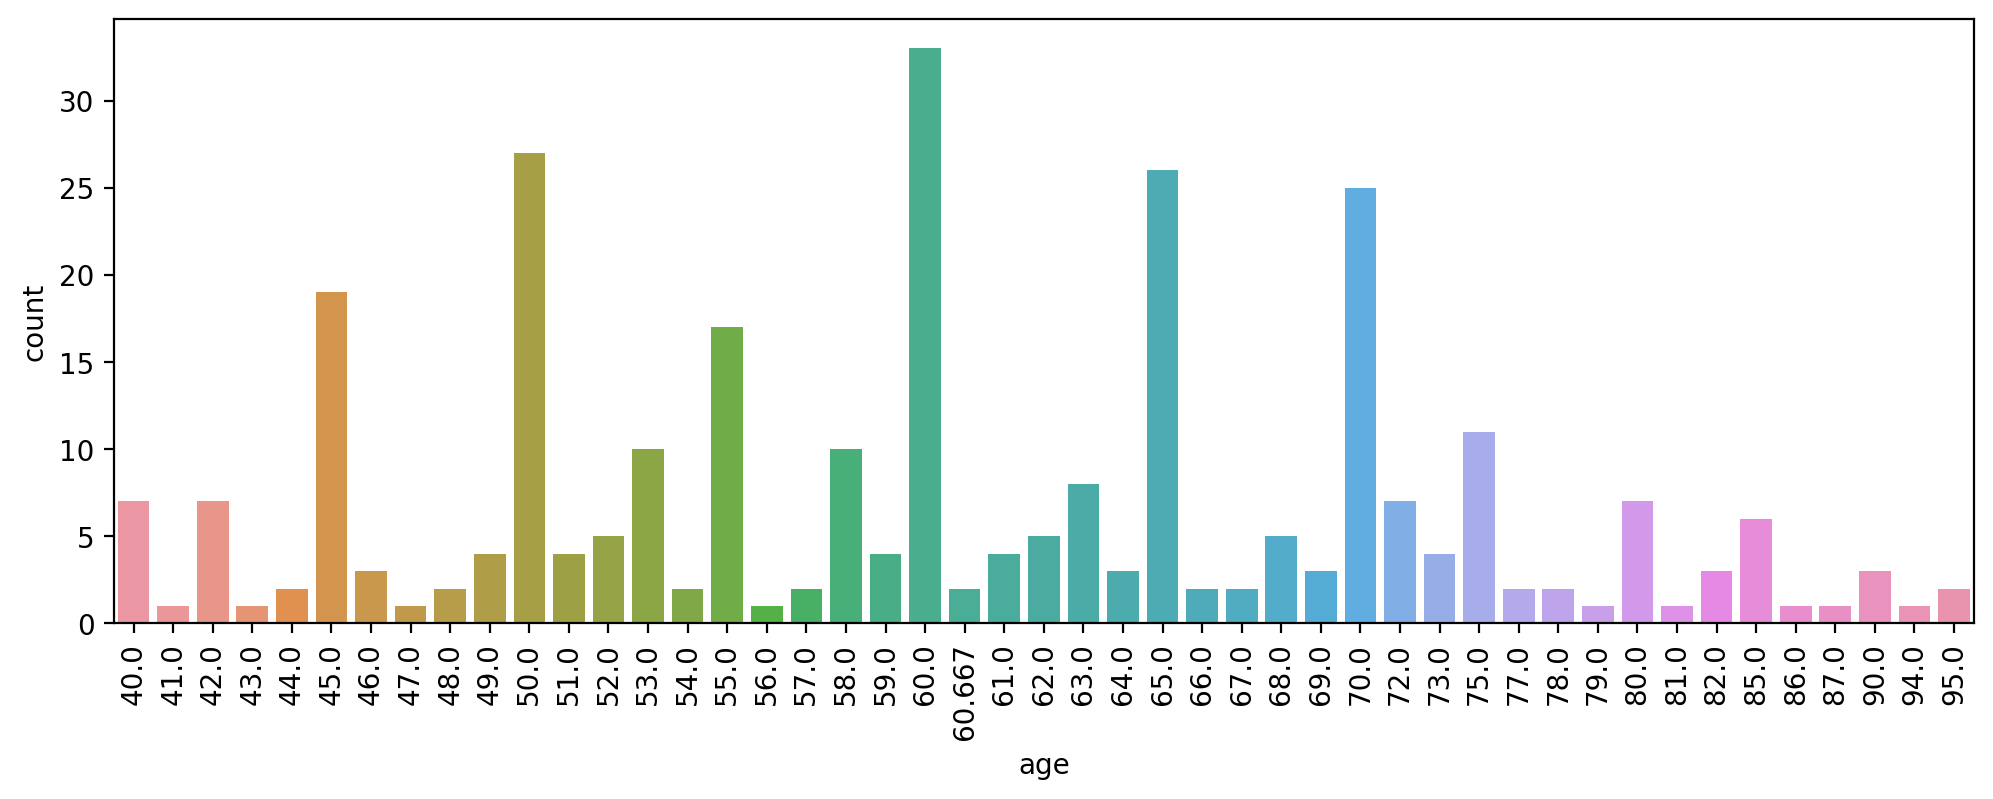

In [7]:
plt.figure(figsize=(12,4),dpi=200)
sns.countplot(data=df,x='age')
plt.xticks(rotation=90);

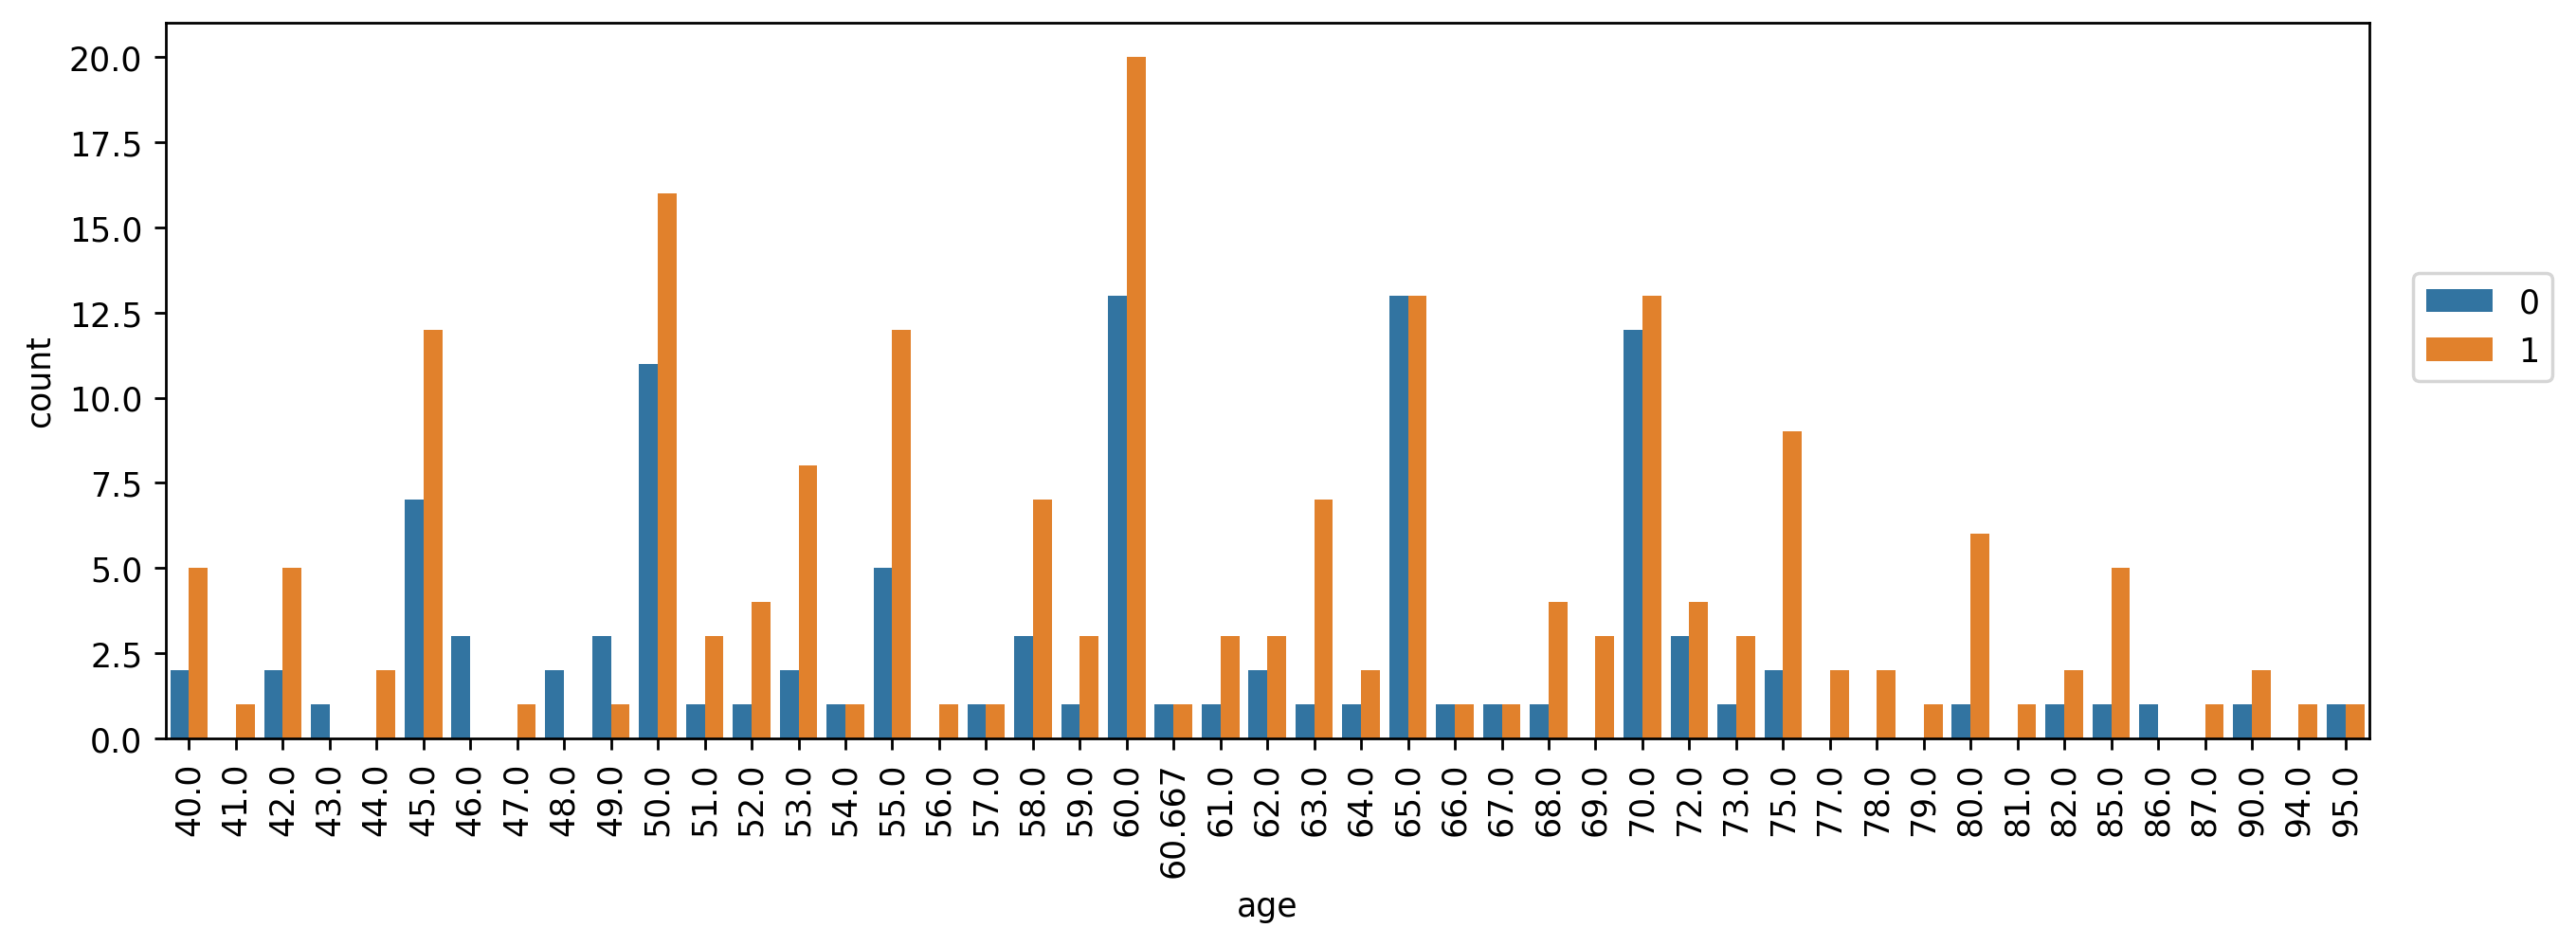

In [8]:
plt.figure(figsize=(12,4),dpi=250)
sns.countplot(data=df,x='age',hue='sex')
plt.legend(loc=(1.02,0.5))
plt.xticks(rotation=90);

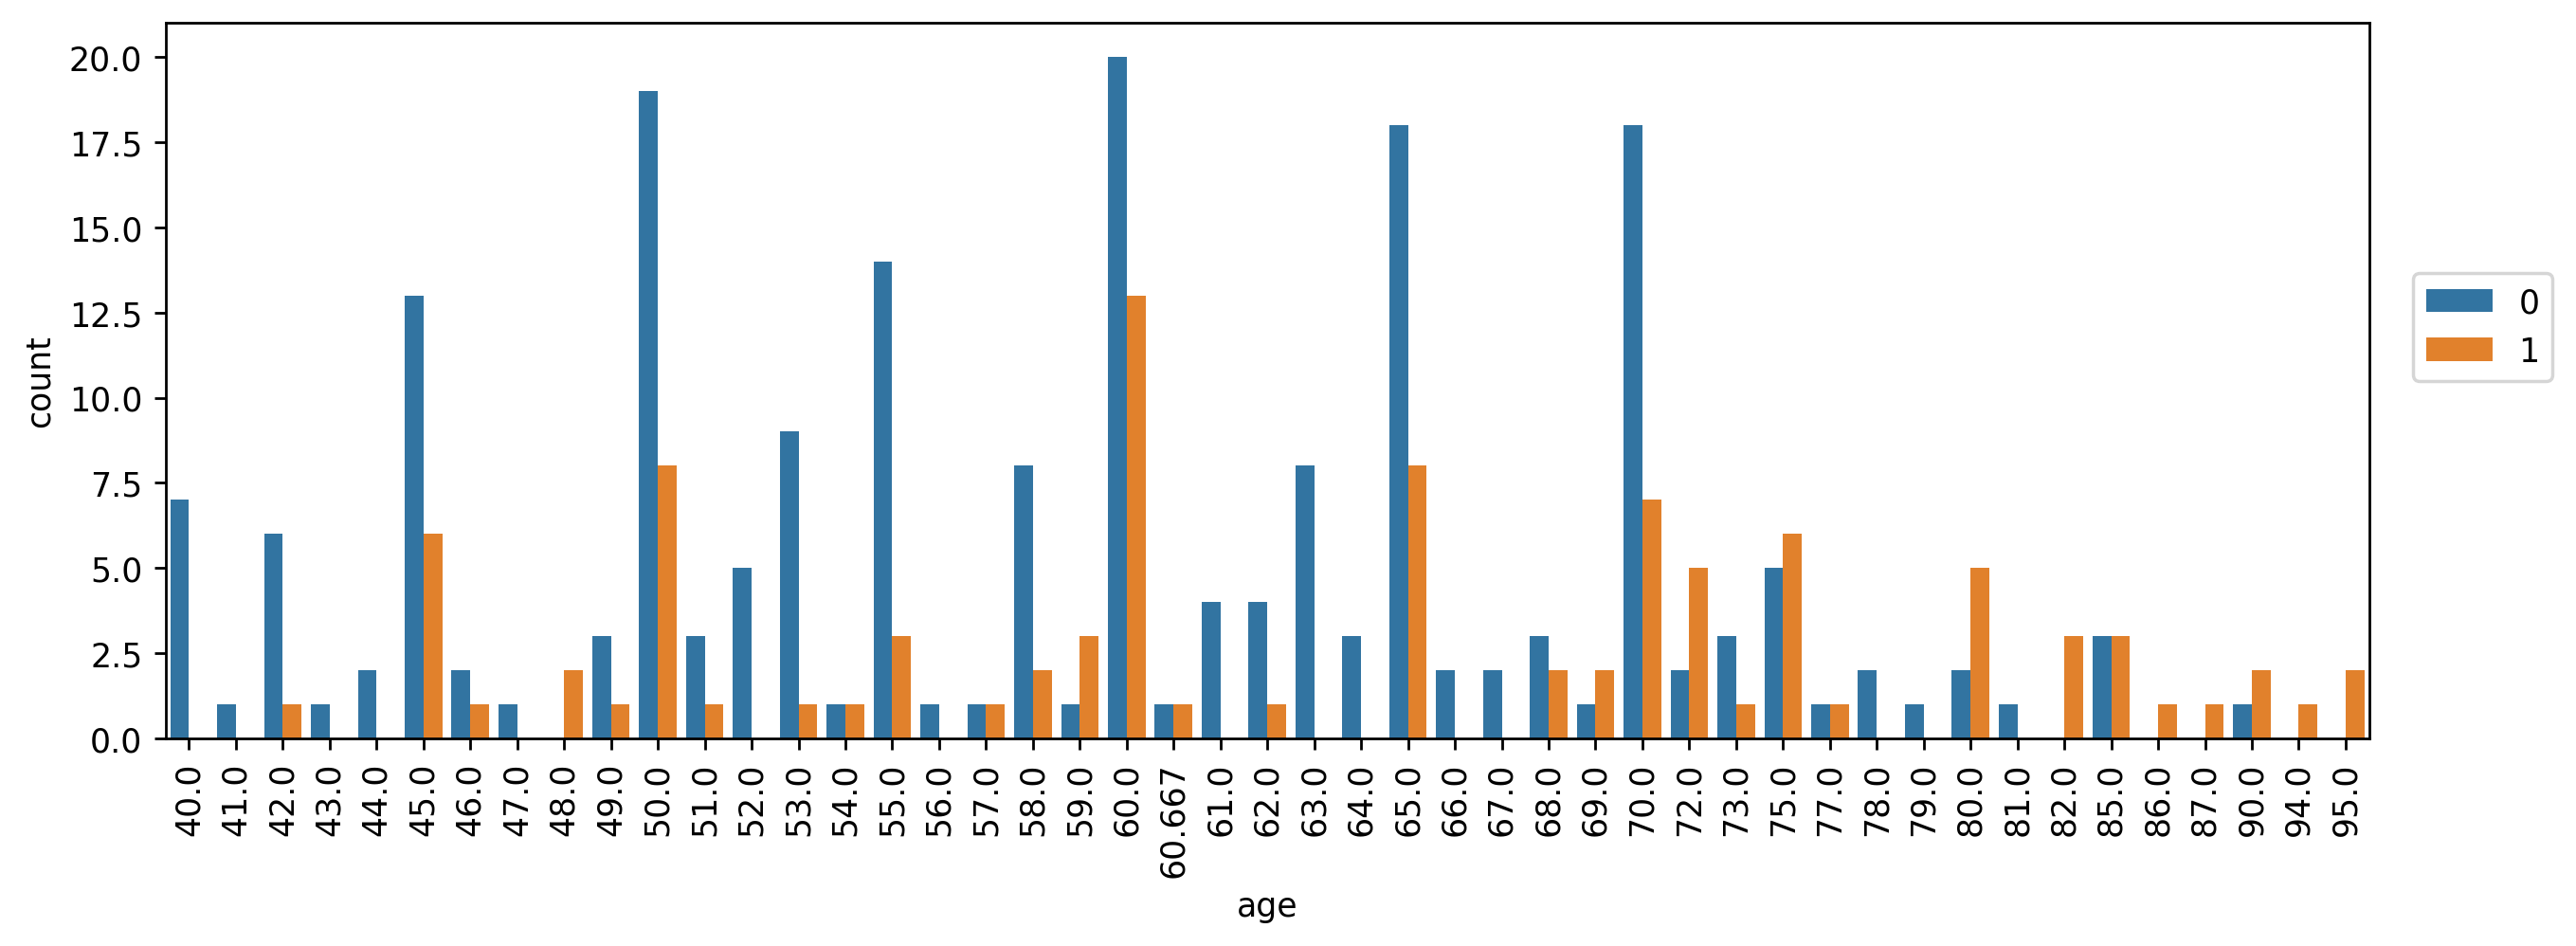

In [9]:
plt.figure(figsize=(12,4),dpi=250)
sns.countplot(data=df,x='age',hue='DEATH_EVENT')
plt.legend(loc=(1.02,0.5))
plt.xticks(rotation=90);

We can see here most death has occurred in age 60 

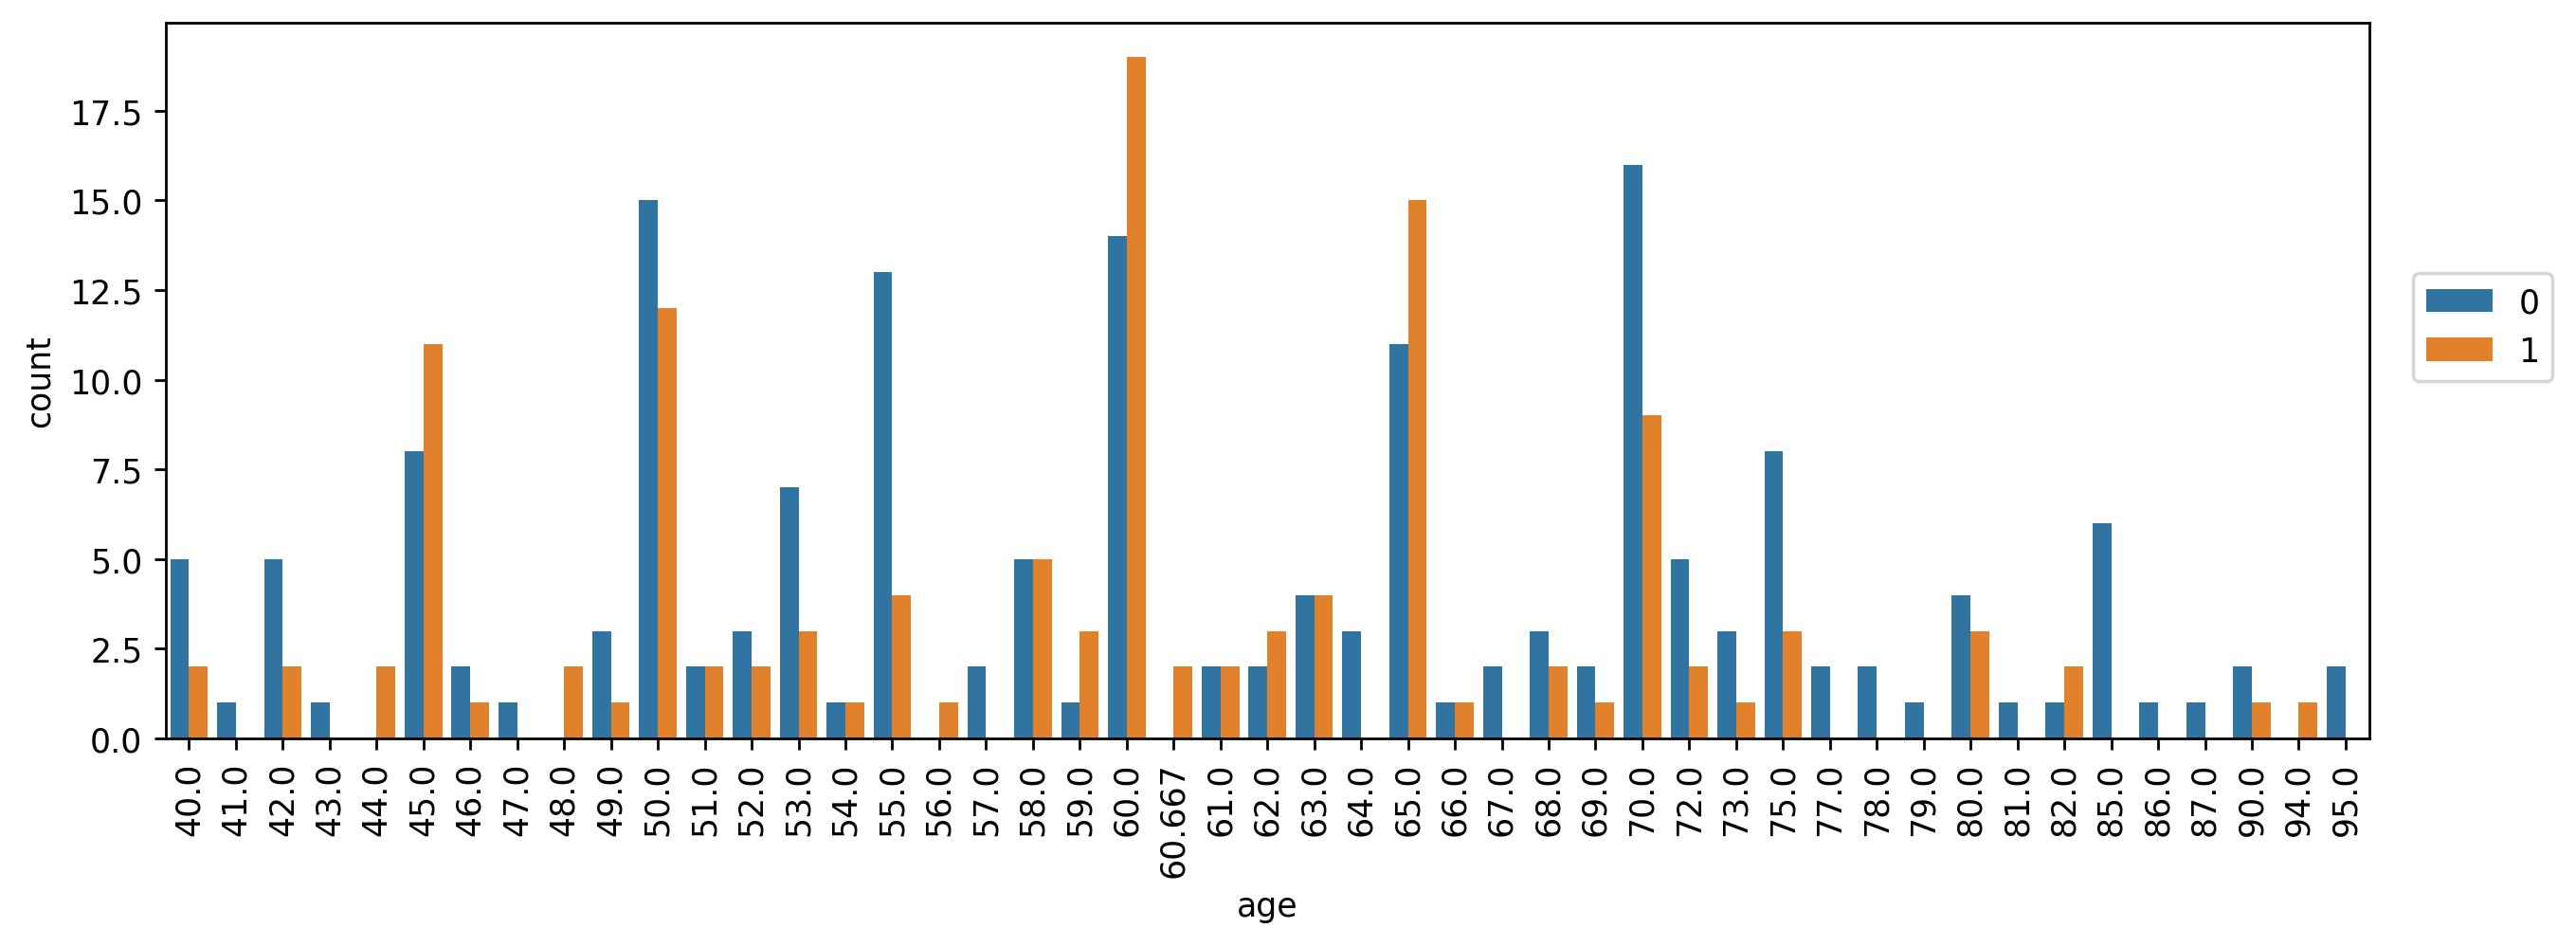

In [10]:
plt.figure(figsize=(12,4),dpi=250)
sns.countplot(data=df,x='age',hue='diabetes')
plt.legend(loc=(1.02,0.5))
plt.xticks(rotation=90);

The high Death occurred in age group 60 because the 60 age group people have high dibites and the high dibties causes the death we can demonstrate by age group 70 where people have not dibites and have less death

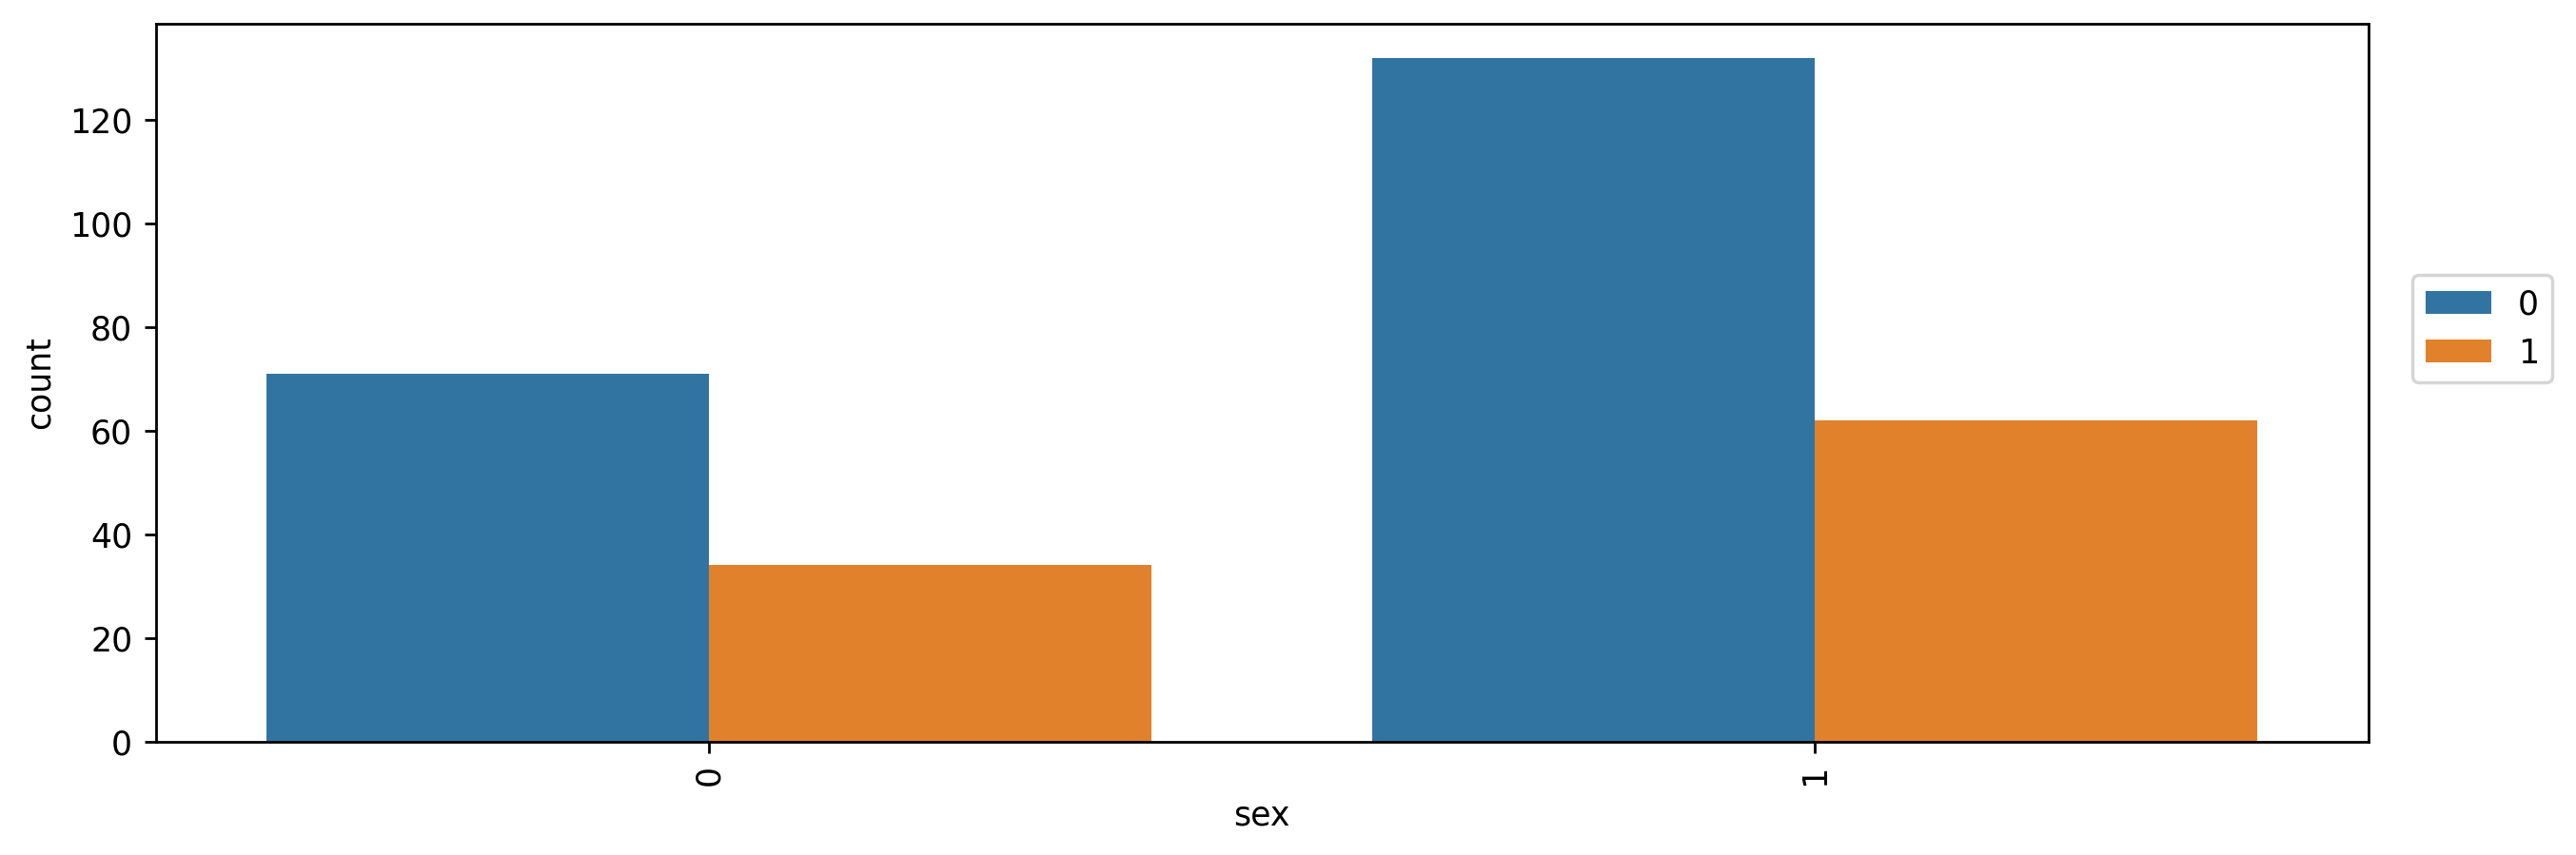

In [11]:
plt.figure(figsize=(12,4),dpi=250)
sns.countplot(data=df,x='sex',hue='DEATH_EVENT')
plt.legend(loc=(1.02,0.5))
plt.xticks(rotation=90);

Male has more death then females due to hearth failuer

<AxesSubplot:>

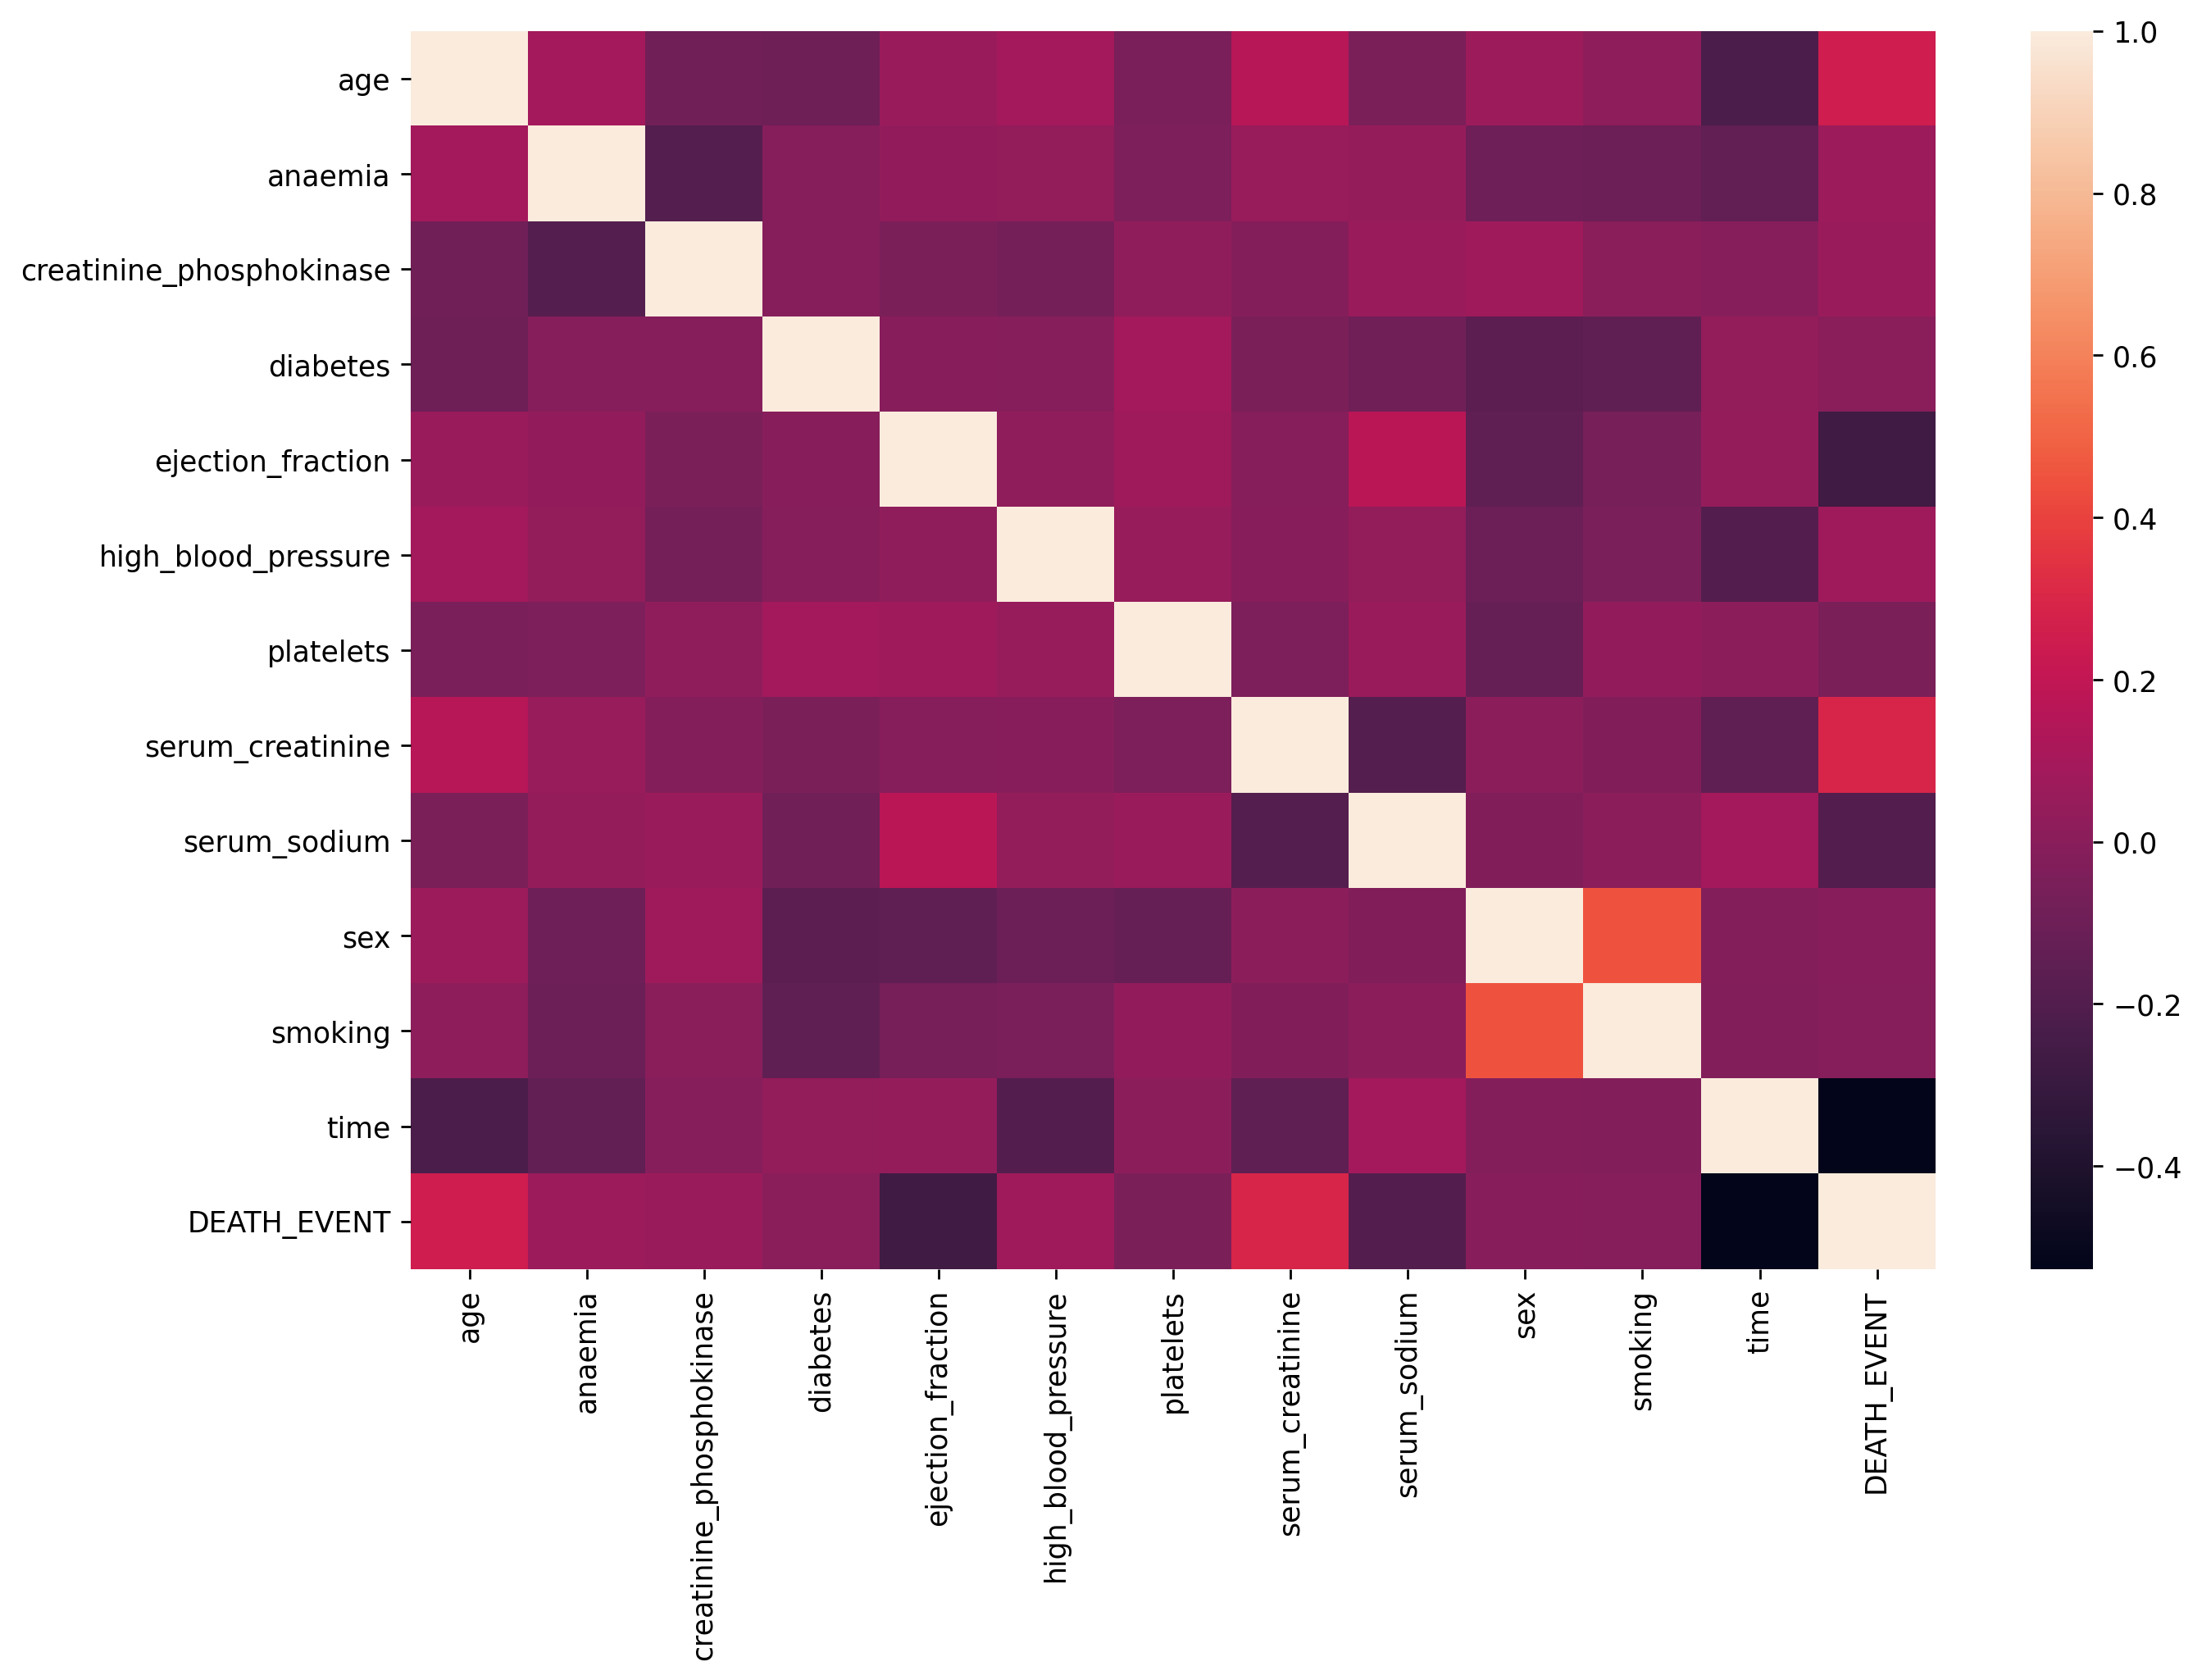

In [12]:
plt.figure(figsize=(12,8),dpi=250)
sns.heatmap(data=df.corr())

# Data preparing

In [8]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

# train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Models Creation

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# DecisionTreeClassifier

In [17]:
Decision = DecisionTreeClassifier(random_state=101)
Decision.fit(X_train,y_train)
D_pred = Decision.predict(X_test)

# RandomForestClassifier

In [18]:
Random = RandomForestClassifier(random_state=101)
Random.fit(X_train,y_train)
R_pred = Random.predict(X_test)

# GradientBoostingClassifier

In [19]:
Gredient = GradientBoostingClassifier(random_state=101)
Gredient.fit(X_train,y_train)
G_pred = Gredient.predict(X_test)

# LogisticRegression

In [20]:
Log = LogisticRegression(random_state=101)
Log.fit(X_train,y_train)
Log_pred = Log.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

# Final Model

In [13]:
model = RandomForestClassifier(max_depth=5,n_estimators=125,min_impurity_split=0.01,random_state=424)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_c

In [16]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        62
           1       0.81      0.79      0.80        28

    accuracy                           0.88        90
   macro avg       0.86      0.85      0.86        90
weighted avg       0.88      0.88      0.88        90



we got 2% increment in accuracy and 3% in f1-score of DEATH_EVENT 1 because we more care about having heart failuer 

In [31]:
print(classification_report(y_test,R_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        62
           1       0.76      0.79      0.77        28

    accuracy                           0.86        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.86      0.86      0.86        90



 Defualt Random forest classification_report

In [32]:
# make a performance Datafream
acc = [77, 86, 82, 84,88]
precision_0 = [83,90,91,85,90]
precision_1 = [63,76,68,82,81]
recall_0 = [84,89,82,94,92]
recall_1 = [61,79,82,64,79]
model = ['Decision_tree','Random_forest','Gredient_boost','Logistic_Regression','FINAL_MODEL']
metric = {'Accuracy':acc,'precision_0':precision_0,'precision_1':precision_1,'recall_0':recall_0,'recall_1':recall_1,
          'Models':model}
performance = pd.DataFrame(data=metric)

In [33]:
performance

,Accuracy,precision_0,precision_1,recall_0,recall_1,Models
0,77,83,63,84,61,Decision_tree
1,86,90,76,89,79,Random_forest
2,82,91,68,82,82,Gredient_boost
3,84,85,82,94,64,Logistic_Regression
4,88,90,81,92,79,FINAL_MODEL
